Naukri Web Scraping is the project based on scraping jobs post related to any domains and their details. It also analyse the scraped data.

In [37]:
# import libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time
import re

In [38]:
# install chromedriver for test
driver=webdriver.Chrome(service=Service(ChromeDriverManager().install( )))

In [39]:
# create dictionary for dataframe
jobs={"job_no":[],
    "roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
      "salaries":[],
     "skills":[],
     "summaries": []}

In [40]:
type(jobs)

dict

In [26]:
for i in range(40):
    driver.get("https://www.naukri.com/data-analyst-jobs-{}".format(i))
    time.sleep(3)
    lst=driver.find_elements(By.CLASS_NAME,"srp-jobtuple-wrapper")
    
    # scrape the data from website
    for index,job in enumerate(lst):
        driver.implicitly_wait(10)
        jobno = (i * len(lst) + index + 1)
        
        # Initialize variables to None
        role = company = location = exp = salary = skill = None  
        
        # scrap data from class_name
        role=job.find_element(By.CLASS_NAME,"title").text
        company=job.find_element(By.CLASS_NAME,"comp-name").text
        location = job.find_element(By.CLASS_NAME, "loc-wrap").text
        exp=job.find_element(By.CLASS_NAME,"exp-wrap").text
        salary=job.find_element(By.CLASS_NAME,"sal-wrap").text
    
        try:
            skill_ul=job.find_element(By.CLASS_NAME,"tags-gt")
            skill_li=skill_ul.find_elements(By.TAG_NAME,"li")
            skill_tag=[]
            for li in skill_li:
                skill_tag.append(li.text)
            skill = ','.join(skill_tag)
        except NoSuchElementException:
            skill = "NA"
        
        #convert list to string
        jobs["job_no"].append(jobno)
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["salaries"].append(salary)
        jobs["skills"].append(skill)

In [28]:
# tranform data into dataframe
df=pd.DataFrame(jobs)
df.head()

,job_no,roles,companies,locations,experience,salaries,skills
0,1,Data Analyst,PPMS Field Marketing Services,Chennai(Kolathur),03 May - 07 May,2-3.5 Lacs PA,"Power Bi,Power Automate,Data Analytics,Sharepo..."
1,2,Data Analyst,Conga,"Pune, Chennai, Ahmedabad, Bengaluru",2-5 Yrs,Not disclosed,"Data modeling,Data quality,Data Analyst,Data a..."
2,3,Data Analyst,Clarivate,Bengaluru,2-7 Yrs,Not disclosed,"Analyst,Data analysis,Data validation,Data man..."
3,4,Data Analyst - L3,Wipro,Bengaluru,4-8 Yrs,Not disclosed,"data analysis,data mining,data warehousing,bus..."
4,5,Data Analyst(English Required),Peroptyx,Remote,0-5 Yrs,Not disclosed,"Data Analysis,English,Data Analytics,Data Mapp..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_no      399 non-null    int64 
 1   roles       399 non-null    object
 2   companies   399 non-null    object
 3   locations   399 non-null    object
 4   experience  399 non-null    object
 5   salaries    399 non-null    object
 6   skills      399 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.9+ KB


In [29]:
def check(df):
    # check for null values
    if df.isnull().values.any():
        print("There are null values in the dataframe.")
    else:
        print("No null values found in the dataframe.")
    
    # check for duplicates
    if df.duplicated().any():
        print("There are duplicate rows in the dataframe.")
    else:
        print("No duplicate rows found in the dataframe.")
    
    # check for data types
    print("\nData types of each column:")
    print(df.dtypes)

In [30]:
check(df)

No null values found in the dataframe.
No duplicate rows found in the dataframe.

Data types of each column:
job_no         int64
roles         object
companies     object
locations     object
experience    object
salaries      object
skills        object
dtype: object


In [ ]:
# save the dataframe to csv file
df.to_csv("naukri_jobs1.csv",index=False)

In [31]:

# there are more than one loaction and skills are attached to each job, let split the location and skills
df['skills']=[skill.split(",") for skill in df.skills]
df['locations']=[location.split(",") for location in df.locations]

In [32]:
df.iloc[:, 3:].head()

,locations,experience,salaries,skills
0,[Chennai(Kolathur)],03 May - 07 May,2-3.5 Lacs PA,"[Power Bi, Power Automate, Data Analytics, Sha..."
1,"[Pune, Chennai, Ahmedabad, Bengaluru]",2-5 Yrs,Not disclosed,"[Data modeling, Data quality, Data Analyst, Da..."
2,[Bengaluru],2-7 Yrs,Not disclosed,"[Analyst, Data analysis, Data validation, Data..."
3,[Bengaluru],4-8 Yrs,Not disclosed,"[data analysis, data mining, data warehousing,..."
4,[Remote],0-5 Yrs,Not disclosed,"[Data Analysis, English, Data Analytics, Data ..."


In [33]:
df.head()

,job_no,roles,companies,locations,experience,salaries,skills
0,1,Data Analyst,PPMS Field Marketing Services,[Chennai(Kolathur)],03 May - 07 May,2-3.5 Lacs PA,"[Power Bi, Power Automate, Data Analytics, Sha..."
1,2,Data Analyst,Conga,"[Pune, Chennai, Ahmedabad, Bengaluru]",2-5 Yrs,Not disclosed,"[Data modeling, Data quality, Data Analyst, Da..."
2,3,Data Analyst,Clarivate,[Bengaluru],2-7 Yrs,Not disclosed,"[Analyst, Data analysis, Data validation, Data..."
3,4,Data Analyst - L3,Wipro,[Bengaluru],4-8 Yrs,Not disclosed,"[data analysis, data mining, data warehousing,..."
4,5,Data Analyst(English Required),Peroptyx,[Remote],0-5 Yrs,Not disclosed,"[Data Analysis, English, Data Analytics, Data ..."


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Analyze the data for experience and salary
def analyze_experience(df):
    # Extract experience in years
    df['experience'] = df['experience'].str.extract(r'(\d+)')
    df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
    
    # Plotting the experience distribution
    plt.figure(figsize=(10, 6))
    df['experience'].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title('Experience Distribution')
    plt.xlabel('Years of Experience')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

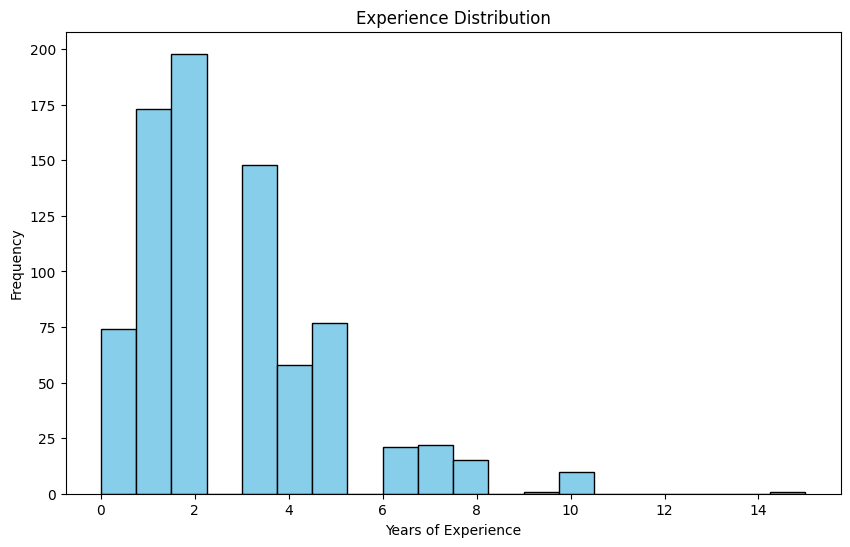

In [45]:
analyze_experience(df)

In [46]:
# Analyze in salary
salaries_count=df['salaries'].value_counts()
total_sal=len(df['salaries'])
salaries_per=(salaries_count/total_sal)*100
print("salary catergory and their percentage")
print(salaries_per)

salary catergory and their percentage
salaries
Not disclosed         88.125
15-20 Lacs PA          1.000
2.25-3 Lacs PA         1.000
10-19 Lacs PA          0.625
10-15 Lacs PA          0.500
5-10 Lacs PA           0.500
Unpaid                 0.375
4-8 Lacs PA            0.375
8-18 Lacs PA           0.375
5-8 Lacs PA            0.250
4-5.5 Lacs PA          0.250
5-15 Lacs PA           0.250
2-3.5 Lacs PA          0.250
10-14 Lacs PA          0.250
3-4 Lacs PA            0.250
15-30 Lacs PA          0.250
7-10 Lacs PA           0.125
7-8 Lacs PA            0.125
13-18 Lacs PA          0.125
5-25 Lacs PA           0.125
15-18 Lacs PA          0.125
4.5-6.5 Lacs PA        0.125
2.75-5.5 Lacs PA       0.125
12,000/month           0.125
10-20 Lacs PA          0.125
3-4.5 Lacs PA          0.125
10-16 Lacs PA          0.125
7-11 Lacs PA           0.125
15-27.5 Lacs PA        0.125
50,000-1.5 Lacs PA     0.125
13-15 Lacs PA          0.125
50,000-3 Lacs PA       0.125
3-5 Lacs PA            0.

C:\Users\pugazhenthi\AppData\Local\Temp\ipykernel_16636\2741732157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['salaries'].value_counts().index[:5],


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5')])

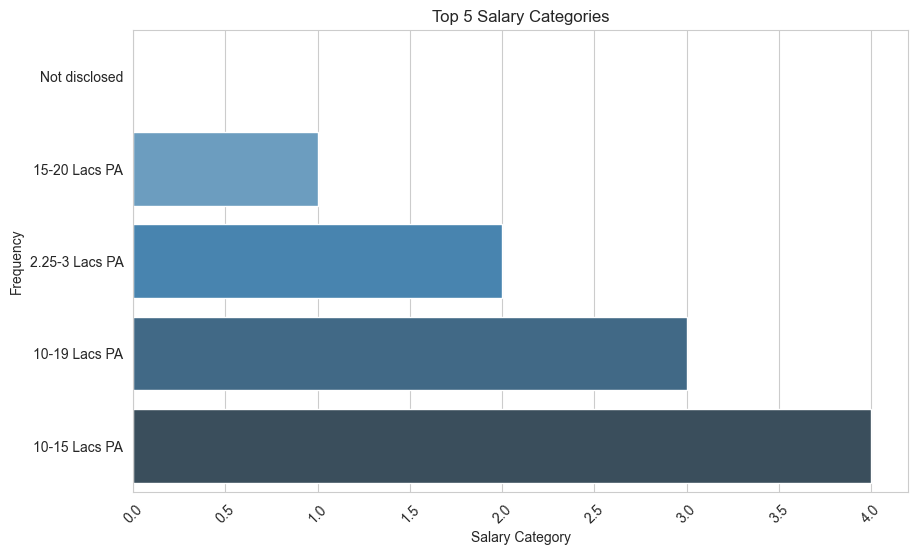

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(df['salaries'].value_counts().index[:5],
            palette="Blues_d")
plt.title('Top 5 Salary Categories')
plt.xlabel('Salary Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 

In [57]:
#splitting the location  columns 
df['locations'] = df['locations'].apply(lambda x: [loc.strip() for loc in x if loc.strip() != ''])

In [58]:
df['locations']

0                        [Chennai(Kolathur)]
1      [Pune, Chennai, Ahmedabad, Bengaluru]
2                                [Bengaluru]
3                                [Bengaluru]
4                                   [Remote]
                       ...                  
795                            [Navi Mumbai]
796                              [New Delhi]
797                                   [Pune]
798                              [Ahmedabad]
799                               [Gurugram]
Name: locations, Length: 800, dtype: object

In [60]:
df.head()

,job_no,roles,companies,locations,experience,salaries,skills
0,1,Data Analyst,PPMS Field Marketing Services,[Chennai(Kolathur)],3.0,2-3.5 Lacs PA,"[Power Bi, Power Automate, Data Analytics, Sha..."
1,2,Data Analyst,Conga,"[Pune, Chennai, Ahmedabad, Bengaluru]",2.0,Not disclosed,"[Data modeling, Data quality, Data Analyst, Da..."
2,3,Data Analyst,Clarivate,[Bengaluru],2.0,Not disclosed,"[Analyst, Data analysis, Data validation, Data..."
3,4,Data Analyst - L3,Wipro,[Bengaluru],4.0,Not disclosed,"[data analysis, data mining, data warehousing,..."
4,5,Data Analyst(English Required),Peroptyx,[Remote],0.0,Not disclosed,"[Data Analysis, English, Data Analytics, Data ..."


In [61]:
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [62]:
df['location']=df['locations'].apply(lambda x: [clean_text(loc) for loc in x])

In [65]:
df['skill'] = df['skills'].apply(lambda x: [clean_text(skill) for skill in x])

In [69]:
df['skill']=df['skill'].apply(lambda x: " ". join(x) if isinstance(x, list) else x)

In [70]:
df['skill']

0      power bi power automate data analytics sharepo...
1      data modeling data quality data analyst data a...
2      analyst data analysis data validation data man...
3      data analysis data mining data warehousing bus...
4      data analysis english data analytics data mapp...
                             ...                        
795    lms aws cloud enterprise data warehousing azur...
796    data analysis data modeling analytical schema ...
797    training programming data analyst mathematics ...
798    data analysis sas data management r programmin...
799    data analysis analytical finance retail financ...
Name: skill, Length: 800, dtype: object

In [73]:
df['location'].apply(lambda x:" ".join(x) if isinstance(x, list) else x)

0                       chennaikolathur
1      pune chennai ahmedabad bengaluru
2                             bengaluru
3                             bengaluru
4                                remote
                     ...               
795                         navi mumbai
796                           new delhi
797                                pune
798                           ahmedabad
799                            gurugram
Name: location, Length: 800, dtype: object

In [80]:
df.columns

Index(['job_no', 'roles', 'companies', 'locations', 'experience', 'salaries',
       'skills', 'location', 'skill'],
      dtype='object')

In [ ]:
df.drop(columns=['locations','skills'],inplace=True)

In [86]:
df.head()

,job_no,roles,companies,experience,salaries,location,skill
0,1,Data Analyst,PPMS Field Marketing Services,3.0,2-3.5 Lacs PA,[chennaikolathur],power bi power automate data analytics sharepo...
1,2,Data Analyst,Conga,2.0,Not disclosed,"[pune, chennai, ahmedabad, bengaluru]",data modeling data quality data analyst data a...
2,3,Data Analyst,Clarivate,2.0,Not disclosed,[bengaluru],analyst data analysis data validation data man...
3,4,Data Analyst - L3,Wipro,4.0,Not disclosed,[bengaluru],data analysis data mining data warehousing bus...
4,5,Data Analyst(English Required),Peroptyx,0.0,Not disclosed,[remote],data analysis english data analytics data mapp...


In [88]:
df['loc']=df['location'].apply(lambda x: ', '.join(x) if isinstance(x, list)  else x)

In [90]:
df.drop(columns=['location'],inplace=True)

In [91]:
df.head()

,job_no,roles,companies,experience,salaries,skill,loc
0,1,Data Analyst,PPMS Field Marketing Services,3.0,2-3.5 Lacs PA,power bi power automate data analytics sharepo...,chennaikolathur
1,2,Data Analyst,Conga,2.0,Not disclosed,data modeling data quality data analyst data a...,"pune, chennai, ahmedabad, bengaluru"
2,3,Data Analyst,Clarivate,2.0,Not disclosed,analyst data analysis data validation data man...,bengaluru
3,4,Data Analyst - L3,Wipro,4.0,Not disclosed,data analysis data mining data warehousing bus...,bengaluru
4,5,Data Analyst(English Required),Peroptyx,0.0,Not disclosed,data analysis english data analytics data mapp...,remote


In [92]:
Area=df['job_no'].groupby(df['loc']).count().reset_index(name='count')
Area.sort_values(by='count',ascending=False,inplace=True)

In [94]:
Area

,loc,count
13,bengaluru,140
107,mumbai,65
77,hyderabad,64
141,pune,57
150,remote,55
...,...,...
52,hybrid delhi ncr,1
50,"hybrid chennai, mumbai all areas",1
49,hybrid chennai,1
48,"hybrid chandigarh, lucknow, jaipur",1


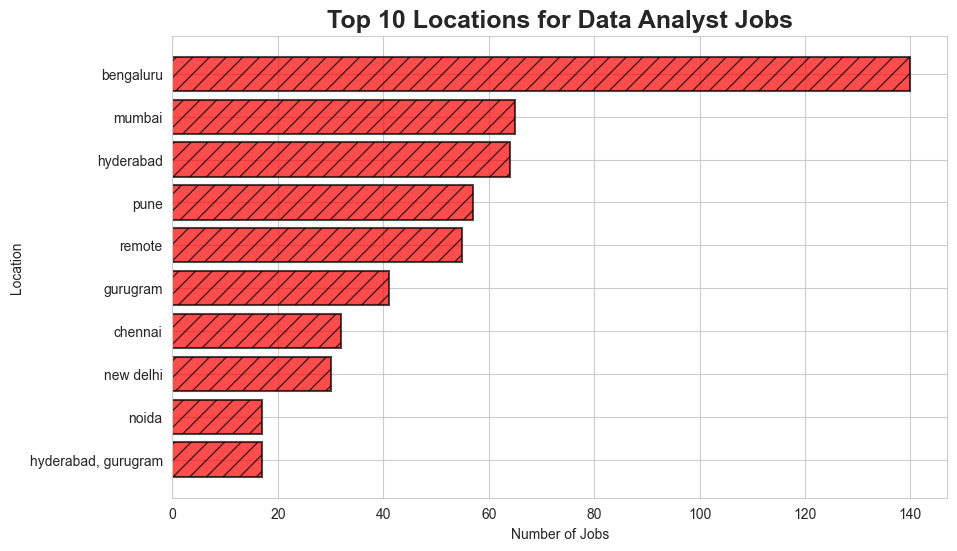

In [103]:
# plot the top 10 locations
plt.figure(figsize=(10, 6))
plt.barh(Area['loc'][:10], Area['count'][:10], color='red', edgecolor='black', alpha=0.7, linewidth=1.5, hatch='//', label='Top 10 Locations')
plt.title('Top 10 Locations for Data Analyst Jobs',weight='bold',fontsize=18)
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top


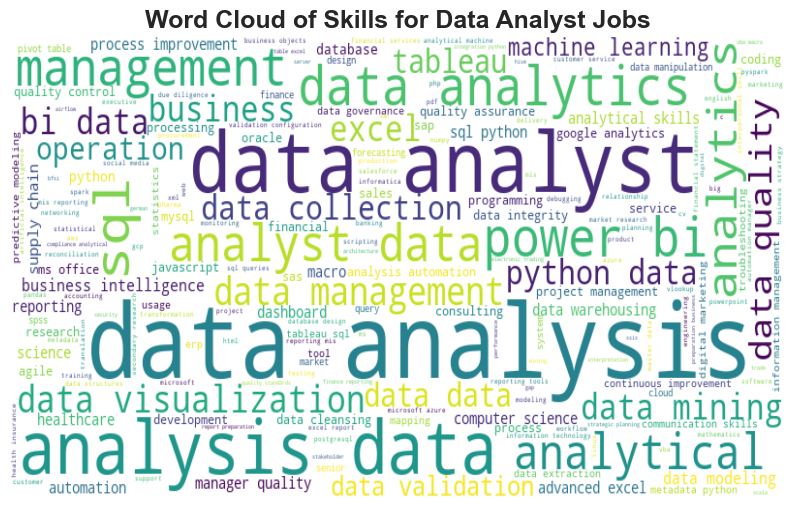

In [104]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['skill']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Skills for Data Analyst Jobs', weight='bold', fontsize=18)
plt.show()


In [ ]:
# analyze the skills
def analyze_skills(df):
    # Count the frequency of each skill
    skills_count = df['skill'].str.split(expand=True).stack().value_counts()
    
    # Plotting the top 10 skills
    plt.figure(figsize=(10, 6))
    sns.barplot(x=skills_count.index[:10], y=skills_count.values[:10], palette="viridis")
    plt.title('Top 10 Skills for Data Analyst Jobs')
    plt.xlabel('Skills')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()      

C:\Users\pugazhenthi\AppData\Local\Temp\ipykernel_16636\1974709424.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skills_count.index[:10], y=skills_count.values[:10], palette="viridis")


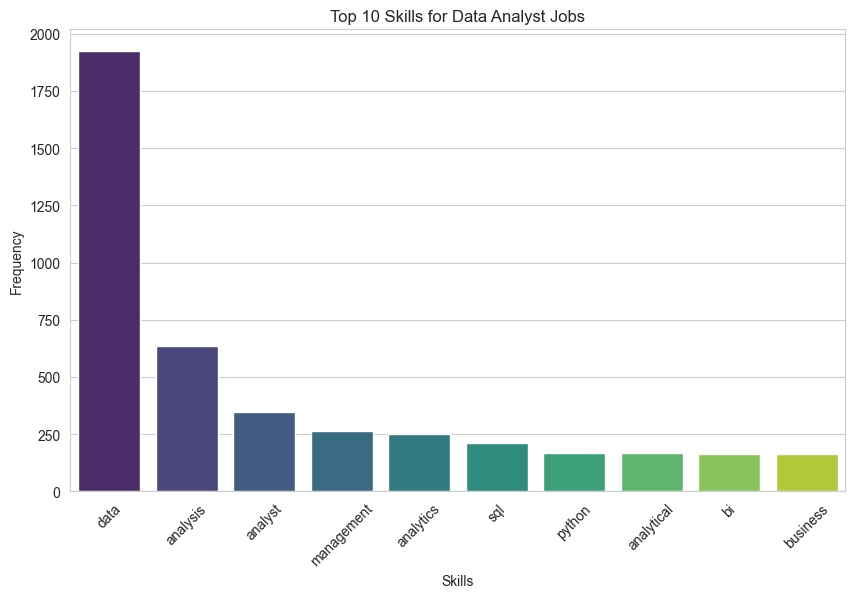

In [106]:
analyze_skills(df)

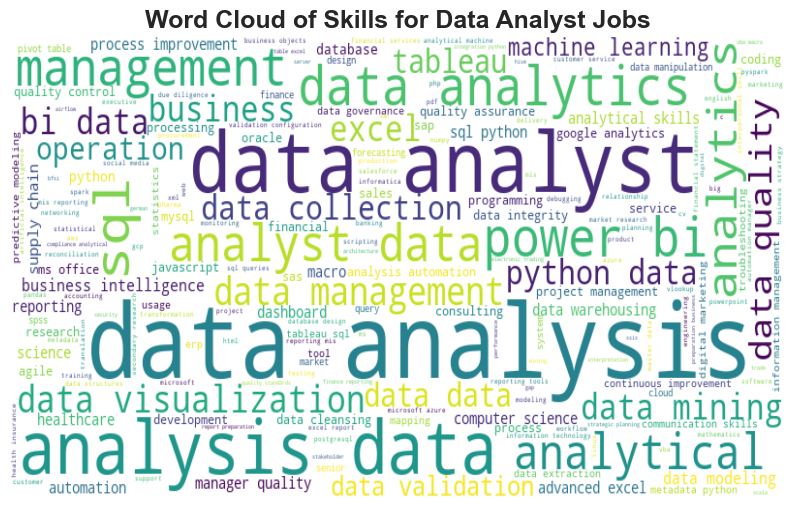

In [107]:
# Assuming df is your DataFrame containing a 'skills' column
w1ordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['skill']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Skills for Data Analyst Jobs', weight='bold', fontsize=18)
plt.show()


# Data analyst (20 pages analyse in naukri.com)
## bengaluru and Mumbai with hyderabad for location most prefered in job location.
## most use case experience in data handling in any differene field for data mangement experience.
## This analysis most understand perference in company for data analyst exp 2-4 year.
